<a href="https://colab.research.google.com/github/aadarshsenapati/machine-learning/blob/main/pandas_colab_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧑‍🎓 Student Version — Solutions Removed
- Use the reflection prompts and hints.
- Your instructor will share solutions separately.

In [1]:
REVEAL_SOLUTIONS = False
print('Solutions are hidden in the Student Version.')

Solutions are hidden in the Student Version.


# Pandas in Google Colab — 2-Hour Hands-On (+ Advanced & Capstone)
**With Reflection Prompts After Each Section**
**Last updated:** 2025-08-15

Run top-to-bottom. Attempt **Exercises**, then write your **✍️ Analysis** under each section.

## 0) Setup & Load the **tips** dataset (10m)

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10); pd.set_option('display.precision', 3)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url); tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
print("Shape:", tips.shape)
print("\nInfo:"); print(tips.info())
print("\nDescribe:"); display(tips.describe(include='all'))

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


**Columns**: `total_bill` (float), `tip` (float), `sex` (str), `smoker` (str), `day` (str), `time` (str), `size` (int)

### ✅ Exercise 0
1) Unique `day`, `time`. 2) Count duplicates. 3) Averages of `total_bill`, `tip`.

**Hints:**
- Concept: inspect levels and duplicates.
- API: `unique`, `duplicated`, `mean`.


In [4]:
# YOUR WORK: Exercise 0
print("Unique Days:", tips['day'].unique())
print("Unique Times:", tips['time'].unique())
dc = tips.duplicated().sum()
print("Number of duplicate rows:", dc)
avg = tips['total_bill'].mean()
tip = tips['tip'].mean()
print("Average Total Bill:", round(avg, 2))
print("Average Tip:", round(tip, 2))

Unique Days: ['Sun' 'Sat' 'Thur' 'Fri']
Unique Times: ['Dinner' 'Lunch']
Number of duplicate rows: 1
Average Total Bill: 19.79
Average Tip: 3.0


### ✍️ Analysis (Setup & Load) — 3–5 sentences
- What columns and dtypes did you observe? Any surprises?
- Is the dataset balanced across `day` and `time`? Cite one count.
- One risk if you skip an initial audit here.


1) The dataset contains float data types like the float64, objects and int 64.The suprizing part is the object data type is having repeted values.
2) No, the dataset is not balanced across day and time as saturday has 87 entries while friday has 19 entries thus the weekend is more than week days.
3) The one risk of skiping internal audits here is we cant get the information about total data as the data is not evenly distributed.


### 🔎 Quick checks
- Report the shape (rows, cols).
- Name 1 non-numeric dtype and why it matters.

1) Shape: (244,7) it means there are 244 rows and 7 columns
2) Day is a non-numeric data type. It matters as it is a categorical data.

### ➕ Extension (pick one)
- Tweak display options and note the effect.
- Compute `value_counts()` on `day` or `time`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [5]:
tips["day"].value_counts()
# Here in the day column we are counting the values. Thus we get which day how much tips are recieved

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


## 1) Import & Core Manipulation (20m)

In [6]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [7]:
tips.iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [9]:
tips.query("time=='Lunch' and smoker=='Yes'").head()

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [10]:
tips.sort_values(['total_bill','tip'], ascending=[False, True]).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [11]:
tips = tips.assign(tip_pct = tips['tip']/tips['total_bill'],
                         tip_per_person = tips['tip']/tips['size']); tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059,0.505
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161,0.553
2,21.01,3.50,Male,No,Sun,Dinner,3,0.167,1.167
3,23.68,3.31,Male,No,Sun,Dinner,2,0.140,1.655
4,24.59,3.61,Female,No,Sun,Dinner,4,0.147,0.902


### ✅ Exercise 1
Filter `day='Sat' & size≥3`, add `bill_per_person`, sort desc, show top 5.

**Hints:**
- Concept: filter → compute → sort.
- API: boolean mask / `.query`, `.assign`, `.sort_values`.


In [12]:
# YOUR WORK: Exercise 1
tips.query("day == 'Sat' and size >= 3").assign(bill_per_person = tips['total_bill'] / tips['size']).sort_values('bill_per_person', ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,bill_per_person
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.197,3.333,16.937
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056,0.833,14.767
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186,2.250,12.082
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139,1.683,12.068
238,35.83,4.67,Female,No,Sat,Dinner,3,0.130,1.557,11.943


### ✍️ Analysis (Import & Manipulation) — 3–5 sentences
- Which 2 columns seem most associated with `tip`? Support with a stat.
- Explain one filter you wrote in plain English.
- One thing you might compute next.

1) The total_bill column and size is associated with tip. The co-relation between the total_bill VS tip and zise vs tip is positive.
2) tips[tips["day"] == "Sat"] here we say the tip of the tip when it is saturday.
3) We ma compute the average tip percentage by day to know which day there is more tip.

### 🔎 Quick checks
- Show first 3 rows of your filtered frame.
- Name one new column and its formula.

In [13]:
# Filer where tip more than 6
f = tips[tips["tip"] > 6]
f.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192,1.895
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139,1.683
141,34.30,6.70,Male,No,Thur,Lunch,6,0.195,1.117


In [14]:
# The new column tip_p stores the tip percent.
tips["tip_p"] = (tips["tip"] / tips["total_bill"])*100
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,tip_p
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059,0.505,5.945
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161,0.553,16.054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.167,1.167,16.659
3,23.68,3.31,Male,No,Sun,Dinner,2,0.140,1.655,13.978
4,24.59,3.61,Female,No,Sun,Dinner,4,0.147,0.902,14.681



### ➕ Extension (pick one)
- Rewrite a filter via `.query` vs mask; compare readability.
- Change a sort order and predict effect.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [15]:
# Using mask
mask = (tips["day"] == "Sat") & (tips["tip"] > 5)
filtered = tips[mask]
filtered.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,tip_p
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192,1.895,19.229
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139,1.683,13.942
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.197,3.333,19.681
211,25.89,5.16,Male,Yes,Sat,Dinner,4,0.199,1.290,19.930
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186,2.250,18.622


In [16]:
# Using .query
filtered = tips.query('day == "Sat" and tip > 5')
filtered.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,tip_p
23,39.42,7.58,Male,No,Sat,Dinner,4,0.192,1.895,19.229
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139,1.683,13.942
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.197,3.333,19.681
211,25.89,5.16,Male,Yes,Sat,Dinner,4,0.199,1.290,19.930
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186,2.250,18.622


## 2) Cleaning & Preprocessing (15m)

In [17]:
tips['sex']=tips['sex'].astype('category')
tips['smoker']=tips['smoker'].astype('category')
tips['day']=tips['day'].astype('category')
tips['time']=tips['time'].astype('category'); tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64
tip_pct,float64
tip_per_person,float64
tip_p,float64


In [18]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

,server_name
0,Alice
1,Bob
2,Alice
3,Bob
4,Alice


In [19]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)
print("Before:", demo.shape, "After:", demo.drop_duplicates().shape)

Before: (246, 11) After: (243, 11)


### ✅ Exercise 2
1) Ensure `size` is int64. 2) Build `tips_clean` with selected cols. 3) Verify no duplicates.

**Hints:**
- Concept: enforce types, subset columns, dedup.
- API: `.astype`, column lists, `.drop_duplicates`.


In [20]:
# YOUR WORK: Exercise 2
# 1)
tips['size'] = tips['size'].astype('int64')
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person,tip_p,server_name
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059,0.505,5.945,Alice
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161,0.553,16.054,Bob
2,21.01,3.50,Male,No,Sun,Dinner,3,0.167,1.167,16.659,Alice
3,23.68,3.31,Male,No,Sun,Dinner,2,0.140,1.655,13.978,Bob
4,24.59,3.61,Female,No,Sun,Dinner,4,0.147,0.902,14.681,Alice


In [21]:
# 2)
clean = tips[["total_bill", "tip", "sex", "smoker", "day", "time", "size", "server_name"]].copy()
clean.head()

,total_bill,tip,sex,smoker,day,time,size,server_name
0,16.99,1.01,Female,No,Sun,Dinner,2,Alice
1,10.34,1.66,Male,No,Sun,Dinner,3,Bob
2,21.01,3.50,Male,No,Sun,Dinner,3,Alice
3,23.68,3.31,Male,No,Sun,Dinner,2,Bob
4,24.59,3.61,Female,No,Sun,Dinner,4,Alice


In [22]:
print("Before:",clean.shape, "\nAfter:",clean.drop_duplicates().shape)

Before: (244, 8) 
After: (243, 8)


### ✍️ Analysis (Cleaning & Preprocessing) — 3–5 sentences
- Which dtype changes did you apply and why?
- Did you handle duplicates? How many?
- One naming or string normalization you made.

1) We haved changed:
   Sex to category: Contains a set of repeated string
   Smoker to category: Contains a set of repeated string
   Day to category: Contains a set of repeated string
   Time to category: Contains a set of repeated string
   Size to int64: Contains number of people at a table

2) Yes we handle duplicates. We have removed and 3 duplicate rows.
3) Yes, I have normalised the server_name column.

### 🔎 Quick checks
- Print memory usage pre/post for 1 cast.
- Confirm duplicates=0 in `tips_clean`.

In [23]:
# 1
t = tips.copy()
print("Before cast:", t['sex'].memory_usage(deep=True))
t['sex'] = t['sex'].astype('category')
print("After cast:", t['sex'].memory_usage(deep=True))

Before cast: 608
After cast: 608


In [24]:
print("Duplicates in clean:", clean.duplicated().sum())

Duplicates in clean: 1


### ➕ Extension (pick one)
- Cast another column and report memory delta.
- Show `.value_counts()` pre/post string cleanup.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [25]:
t = tips.copy()
before = t['day'].memory_usage(deep=True)
t['day'] = t['day'].astype('category')
after = t['day'].memory_usage(deep=True)
print("Before cast:", before)
print("After cast :", after)
print("Memory delta:", before - after)

Before cast: 789
After cast : 789
Memory delta: 0


## 3) Handling Missing Data (15m)

In [26]:
rng = np.random.default_rng(42)
tips_na = clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan; tips_na.loc[mask, 'size'] = np.nan
tips_na.isna().sum()

,0
total_bill,0
tip,21
sex,0
smoker,0
day,0
time,0
size,21
server_name,0


In [27]:
dropped = tips_na.dropna(); dropped.shape

(223, 8)

In [28]:
filled = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()}); filled.isna().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0
server_name,0


In [29]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

/tmp/ipython-input-1629360651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,21
server_name,0


In [30]:
tips_interp = tips_na.sort_values('total_bill')
tips_interp[['tip','size']] = tips_interp[['tip','size']].interpolate()
print(tips_interp.isna().sum())

total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
server_name    0
dtype: int64


### ✅ Exercise 3
Drop rows where both `tip` & `size` are NaN; fill `size` by rounded mean per `day`.

**Hints:**
- Concept: selective drop, grouped fill.
- API: boolean masks, `groupby().transform`, `.fillna`.


In [31]:
# YOUR WORK: Exercise 3
t = tips_na.copy()
mask = t['tip'].isna() & t['size'].isna()
t = t[~mask]
t['size'] = t.groupby('day')['size'].transform(lambda s: s.fillna(round(s.mean())))
print(t.isna().sum())

total_bill     0
tip            0
sex            0
smoker         0
day            0
time           0
size           0
server_name    0
dtype: int64


/tmp/ipython-input-312396290.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t['size'] = t.groupby('day')['size'].transform(lambda s: s.fillna(round(s.mean())))


### ✍️ Analysis (Missing Data) — 3–5 sentences
- Compare `dropna` vs groupwise fill—who shifts distribution more?
- What assumption does your fill strategy make?
- When would interpolation be inappropriate here?

1) dropna skews distribution by removing rows, while groupwise fill smooths values toward group averages with less distortion.
2) It assumes that missing values resemble the typical (median/mean) behavior within their group (e.g., same day & time).
3) Interpolation would be inappropriate here because tip and size are categorical-like event outcomes, not continuous time-series.


### 🔎 Quick checks
- Report NaN counts before vs after.
- Cite one numeric change for `tip`.


In [32]:
import pandas as pd
import numpy as np
tips.loc[5:25:5, "tip"] = np.nan
tips.loc[3:18:5, "size"] = np.nan
print("NaN counts before:\n", tips[["tip", "size"]].isna().sum())
tips["tip"] = tips.groupby("day")["tip"].transform(lambda g: g.fillna(g.median()))
tips["size"] = tips.groupby("day")["size"].transform(lambda g: g.fillna(g.median()))
print("\nNaN counts after:\n", tips[["tip", "size"]].isna().sum())
example_idx = 5
print(f"\nExample: index {example_idx} tip = {tips.loc[example_idx, 'tip']}")

NaN counts before:
 tip     5
size    4
dtype: int64

NaN counts after:
 tip     0
size    0
dtype: int64

Example: index 5 tip = 3.12


/tmp/ipython-input-2184520414.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips["tip"] = tips.groupby("day")["tip"].transform(lambda g: g.fillna(g.median()))
/tmp/ipython-input-2184520414.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips["size"] = tips.groupby("day")["size"].transform(lambda g: g.fillna(g.median()))



### ➕ Extension (pick one)
- Try a different group key for fill and compare MAE.
- Plot hist pre/post fill for `tip`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

/tmp/ipython-input-3255570606.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips["tip"] = tips.groupby("day")["tip"].transform(lambda g: g.fillna(g.median()))


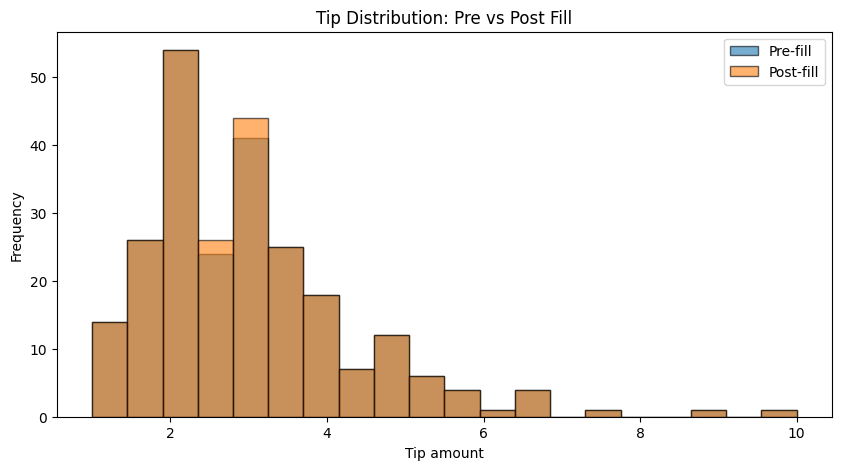

In [33]:
tips.loc[5:25:5, "tip"] = np.nan
tips_pre = tips.copy()
tips["tip"] = tips.groupby("day")["tip"].transform(lambda g: g.fillna(g.median()))
plt.figure(figsize=(10,5))
plt.hist(tips_pre["tip"].dropna(), bins=20, alpha=0.6, label="Pre-fill", edgecolor="black")
plt.hist(tips["tip"], bins=20, alpha=0.6, label="Post-fill", edgecolor="black")
plt.title("Tip Distribution: Pre vs Post Fill")
plt.xlabel("Tip amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## 4) Analysis & Visualization (20m)

In [34]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))

Overall tip %: 0.151


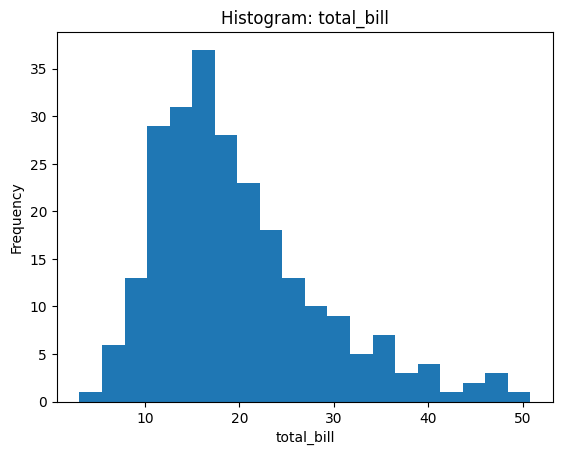

In [35]:
plt.figure(); plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill'); plt.xlabel('total_bill'); plt.ylabel('Frequency'); plt.show()

/tmp/ipython-input-2922675328.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(tips['day'].cat.categories))


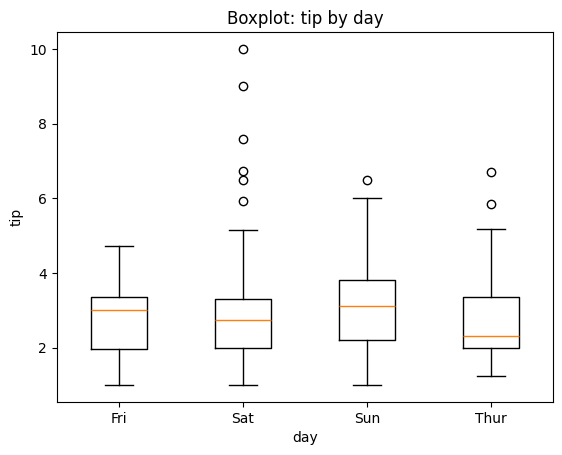

In [36]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day'); plt.xlabel('day'); plt.ylabel('tip'); plt.show()

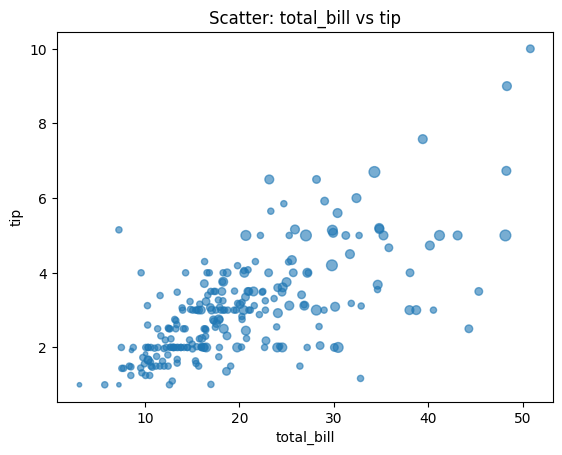

In [37]:
plt.figure(); plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip'); plt.xlabel('total_bill'); plt.ylabel('tip'); plt.show()

/tmp/ipython-input-3890832865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_pct = tips.groupby('day')['tip_pct'].mean()


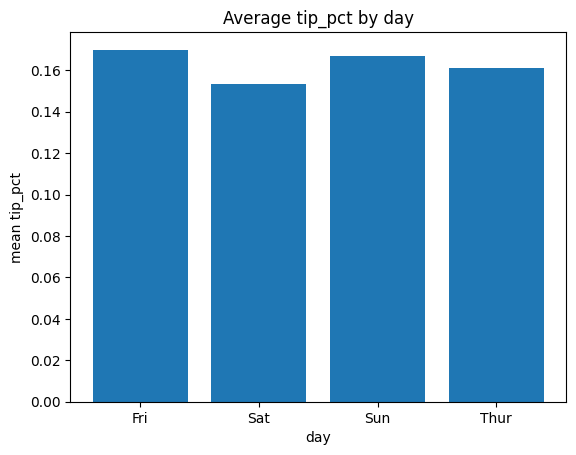

In [38]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day'); plt.xlabel('day'); plt.ylabel('mean tip_pct'); plt.show()

### ✅ Exercise 4
1) Scatter: `total_bill` vs `tip_pct`. 2) Bar: median `total_bill` by `time`.

**Hints:**
- Concept: relate vars via scatter; summarize via bar.
- API: `plt.scatter`, `groupby().median` + `plt.bar`.


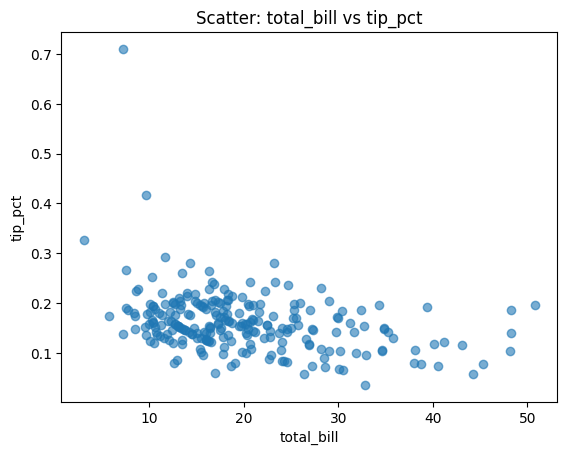

C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\156370373.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_bill = tips.groupby('time')['total_bill'].median()


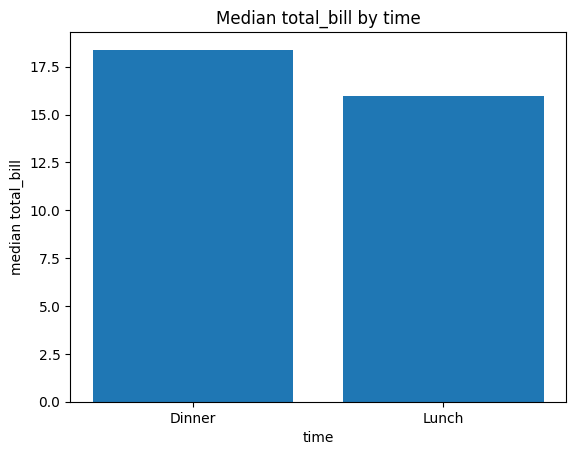

In [ ]:
# YOUR WORK: Exercise 4
plt.figure()
plt.scatter(tips['total_bill'], tips['tip_pct'], alpha=0.6)
plt.title('Scatter: total_bill vs tip_pct')
plt.xlabel('total_bill')
plt.ylabel('tip_pct')
plt.show()
median_bill = tips.groupby('time')['total_bill'].median()
plt.figure()
plt.bar(median_bill.index.astype(str), median_bill.values)
plt.title('Median total_bill by time')
plt.xlabel('time')
plt.ylabel('median total_bill')
plt.show()


### ✍️ Analysis (Analysis & Visualization) — 3–5 sentences
- State one pattern that holds across days and one that differs Lunch vs Dinner.
- Interpret scatter: linear? heteroscedastic?
- What would you plot next?

1) i) Across all days, higher total bills tend to be associated with higher absolute tips
   ii) Dinner bills are typically much larger in median value than Lunch bills, which drives higher absolute tips but similar or only slightly higher tip percentages.
2) Total bill vs tip: linear
   Total bill vs tip_pct: heteroscedastic
3) Boxplot of tip_pct by size

### 🔎 Quick checks
- Quote one `.describe()` stat that supports your claim.
- Ensure axes labels/titles are informative.

      count   mean    std    min    25%    50%    75%    max
size                                                        
1.0     4.0  0.217  0.080  0.138  0.171  0.203  0.249  0.326
2.0   158.0  0.166  0.066  0.036  0.136  0.157  0.195  0.710
3.0    37.0  0.151  0.045  0.056  0.124  0.159  0.181  0.231
4.0    36.0  0.145  0.043  0.077  0.117  0.144  0.173  0.281
5.0     5.0  0.141  0.068  0.066  0.107  0.121  0.172  0.242
6.0     4.0  0.156  0.042  0.104  0.132  0.163  0.187  0.195


<Figure size 640x480 with 0 Axes>

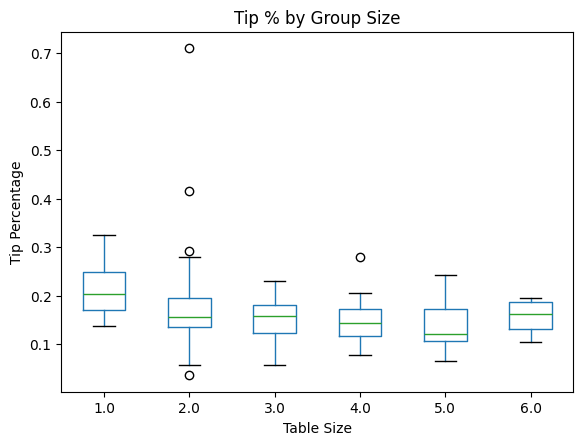

In [ ]:
stats = tips.groupby("size")["tip_pct"].describe()
print(stats)
plt.figure()
tips.boxplot(column="tip_pct", by="size", grid=False)
plt.title("Tip % by Group Size")
plt.suptitle("")
plt.xlabel("Table Size")
plt.ylabel("Tip Percentage")
plt.show()

### ➕ Extension (pick one)
- Add a follow-up chart (e.g., tip% by party size) and describe it.
- Bucket `total_bill` and compare medians.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

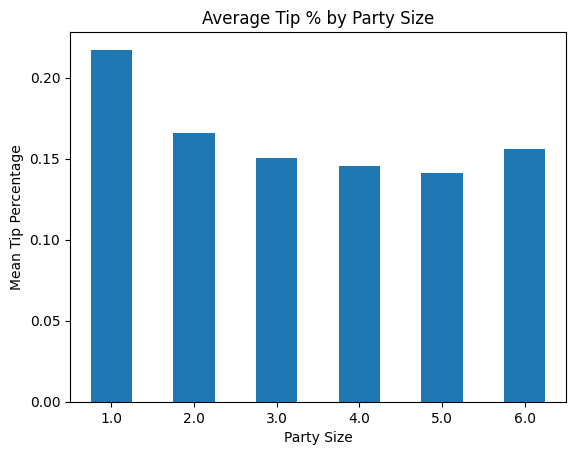

In [ ]:
plt.figure()
tips.groupby("size")["tip_pct"].mean().plot(kind="bar", rot=0)
plt.title("Average Tip % by Party Size")
plt.xlabel("Party Size")
plt.ylabel("Mean Tip Percentage")
plt.show()

## 5) Grouping & Merging (20m)

In [ ]:
g = (tips.groupby(['day','time'])
       .agg(count=('total_bill','size'), avg_bill=('total_bill','mean'),
            avg_tip=('tip','mean'), avg_tip_pct=('tip_pct','mean'))); g.head()

C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\754671917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (tips.groupby(['day','time'])


count  avg_bill  avg_tip  avg_tip_pct
day time                                         
Fri Dinner     12    19.663    2.940        0.159
    Lunch       7    12.846    2.383        0.189
Sat Dinner     87    20.441    2.983        0.153
    Lunch       0       NaN      NaN          NaN
Sun Dinner     76    21.410    3.242        0.167

In [ ]:
def pct_above_20(s): return (s>0.20).mean()

tips.groupby('day')['tip_pct'].apply(pct_above_20)

C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\4290215540.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip_pct'].apply(pct_above_20)


day
Fri     0.211
Sat     0.115
Sun     0.197
Thur    0.161
Name: tip_pct, dtype: float64

In [ ]:
day_lookup = pd.DataFrame({'day':['Thur','Fri','Sat','Sun'],'is_weekend':[False,False,True,True]})
tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

,day,is_weekend
90,Fri,False
19,Sat,True
0,Sun,True
77,Thur,False


### ✅ Exercise 5
1) Sum `total_bill` & `tip` by `smoker,sex`. 2) Map `time`→L/D and show pairs.

**Hints:**
- Concept: summarize by groups; enrich via merge.
- API: `groupby().agg`, `.merge`.


In [ ]:
# YOUR WORK: Exercise 5
t = tips.groupby(["smoker", "sex"]).agg(
    sum=("total_bill", "sum"),
    tsum=("tip", "sum")
).reset_index()

print(group1)


t = pd.DataFrame({
    "time": ["Lunch", "Dinner"],
    "meal": ["L", "D"]
})
t1 = tips.merge(t, on="time", how="left")
print(t1[["time", "meal"]].drop_duplicates())

  smoker     sex  total_bill_sum  tip_sum
0     No  Female          977.68   149.77
1     No    Male         1919.75   300.10
2    Yes  Female          593.27    96.74
3    Yes    Male         1337.07   183.07
      time meal
0   Dinner    D
77   Lunch    L


C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\2046095230.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t = tips.groupby(["smoker", "sex"]).agg(


### ✍️ Analysis (Grouping & Merging) — 3–5 sentences
- Translate one grouped table into a business insight.
- How does `tip_pct` vs `tip` change ranking?
- What join-key assumptions are you making?

1) Non smoking males contribute the largest share of revenue than that of female.
2) By tip amount, non-smokers rank highest, but by tip%, smokers—especially females—climb in ranking despite lower totals.
3) I’m assuming the join key day is consistent across both DataFrames and that each day maps uniquely to a weekend flag.

### 🔎 Quick checks
- Show index/columns of grouped result.
- Check row counts before/after a merge.

In [ ]:
print("Index:", g.index.names)
print("Columns:", g.columns)
print("Tips row count:", len(tips))
print("Tips_merge row count:", len(tips_merge))

Index: ['day', 'time']
Columns: Index(['count', 'avg_bill', 'avg_tip', 'avg_tip_pct'], dtype='object')
Tips row count: 244
Tips_merge row count: 244


### ➕ Extension (pick one)
- Add `avg_tip_pp` and re-rank groups.
- Outer join with `_indicator` and explain one mismatch.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [ ]:
tips['avg_tip_pp'] = tips['tip'] / tips['size']
g = tips.groupby(['day','time']).agg(
    tip_sum=('tip','sum'),
    avg_tip_pp=('avg_tip_pp','mean')
).reset_index()
rank = g.sort_values('avg_tip_pp', ascending=False)
print(rank)

    day    time  tip_sum  avg_tip_pp
6  Thur  Dinner     3.00       1.500
0   Fri  Dinner    35.28       1.371
1   Fri   Lunch    16.68       1.257
4   Sun  Dinner   246.41       1.229
2   Sat  Dinner   259.48       1.206
7  Thur   Lunch   168.83       1.172
3   Sat   Lunch     0.00         NaN
5   Sun   Lunch     0.00         NaN


C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\3793779222.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tips.groupby(['day','time']).agg(


## 6) Reshaping & Pivoting (15m)

In [ ]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv

C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\3973676478.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv


time,Dinner,Lunch
day,,
Fri,0.159,0.189
Sat,0.153,NaN
Sun,0.167,NaN
Thur,0.160,0.161


In [ ]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'], var_name='metric', value_name='value'); long.head()

,day,time,metric,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59


### ✅ Exercise 6
1) Pivot mean `total_bill` by `size`×`day`. 2) Melt back to long with `size` as id.

**Hints:**
- Concept: reshape wide↔long.
- API: `pivot_table`, `melt`.


In [ ]:
# YOUR WORK: Exercise 6
t = tips.pivot_table(
    index="day",
    columns="size",
    values="total_bill",
    aggfunc="mean"
)

print(t)
l = t.reset_index().melt(
    id_vars="day",
    var_name="size",
    value_name="mean_total_bill"
)

print(l.head())

size    1.0     2.0     3.0     4.0    5.0     6.0
day                                               
Fri    8.58  16.322  15.980  40.170    NaN     NaN
Sat    5.16  16.837  25.509  29.876  28.15     NaN
Sun     NaN  17.567  22.556  27.174  27.00  48.170
Thur  10.07  15.157  19.160  29.950  41.19  30.383
    day size  mean_total_bill
0   Fri  1.0            8.580
1   Sat  1.0            5.160
2   Sun  1.0              NaN
3  Thur  1.0           10.070
4   Fri  2.0           16.322


C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\1689084357.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  t = tips.pivot_table(


### ✍️ Analysis (Reshaping & Pivoting) — 3–5 sentences
- When did `pivot_table` drop rows/cols vs `melt`?
- Explain wide↔long trade-offs here.
- Which format suits your chosen chart and why?

1) pivot_table drops rows/cols when combinations of day×size don’t exist, while melt keeps every row intact.
2) Wide format simplifies comparisons across groups, while long format preserves row-level detail for flexible analysis/plotting.
3) Long format suits the chart best because plotting libraries map variables to axes more easily from tidy data.

### 🔎 Quick checks
- Confirm shapes of pivot vs long tables.
- List index/columns used in your pivot.

In [ ]:
piv = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='mean')
print("Pivot shape:", piv.shape)
print("Pivot index:", piv.index.name)
print("Pivot columns:", piv.columns.name)
long = piv.reset_index().melt(id_vars=['day'], var_name='size', value_name='mean_total_bill')
print("Long shape:", long.shape)
print("Long columns:", long.columns.tolist())

Pivot shape: (4, 6)
Pivot index: day
Pivot columns: size
Long shape: (24, 3)
Long columns: ['day', 'size', 'mean_total_bill']


C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\592309876.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='mean')


### ➕ Extension (pick one)
- Change `aggfunc` and compare results.
- Add a second dimension in pivot.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [ ]:
mean = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='mean')
median = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='median')
sum = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='sum')
print("Mean:\n", mean.head(), "\n")
print("Median:\n", median.head(), "\n")
print("Sum:\n", sum.head())

Mean:
 size    1.0     2.0     3.0     4.0    5.0     6.0
day                                               
Fri    8.58  16.322  15.980  40.170    NaN     NaN
Sat    5.16  16.837  25.509  29.876  28.15     NaN
Sun     NaN  17.567  22.556  27.174  27.00  48.170
Thur  10.07  15.157  19.160  29.950  41.19  30.383 

Median:
 size    1.0     2.0     3.0    4.0    5.0    6.0
day                                             
Fri    8.58  14.400  15.980  40.17    NaN    NaN
Sat    5.16  15.530  22.355  25.89  28.15    NaN
Sun     NaN  16.820  20.955  25.56  29.85  48.17
Thur  10.07  14.205  18.675  27.20  41.19  29.80 

Sum:
 size    1.0     2.0     3.0     4.0    5.0    6.0
day                                              
Fri    8.58  261.15   15.98   40.17   0.00   0.00
Sat   10.32  892.37  459.17  388.39  28.15   0.00
Sun    0.00  720.24  315.79  461.96  81.00  48.17
Thur  10.07  727.53   76.64  149.75  41.19  91.15


C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\180873598.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='mean')
C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\180873598.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  median = tips.pivot_table(index='day', columns='size', values='total_bill', aggfunc='median')
C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\180873598.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current be

## 7) Mini-Project: When are tips the most generous? (5–10m)

day   time  
Fri   Lunch     0.189
Sun   Dinner    0.167
Thur  Lunch     0.161
      Dinner    0.160
Fri   Dinner    0.159
dtype: float64


C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\157246538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


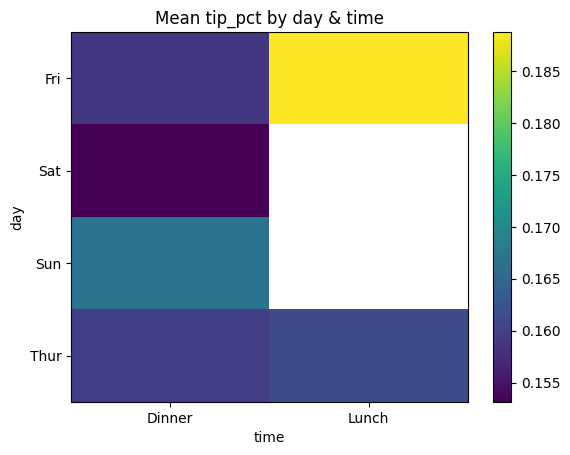

In [ ]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print(piv.stack().sort_values(ascending=False).head(5))
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time'); plt.xlabel('time'); plt.ylabel('day')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show()

### ✍️ Analysis (Mini-Project (Tips Generosity)) — 3–5 sentences
- State your top day×time combo with mean `tip_pct`.
- Is it robust to outliers? How to check?
- One follow-up action for a restaurant.

1) 0.189
2) No, it is not rebust to outlines as we can compute the median tip% for the same day×time.
3) A follow-up action could be targeting promotions or service incentives on the top-performing day×time.

### 🔎 Quick checks
- Show top 3 combos and their counts.
- Confirm sample size for top combo.

In [ ]:
combo_counts = tips.groupby(['day', 'time']).size().sort_values(ascending=False)
print("Top 3 day×time combos:\n", combo_counts.head(3))
top_combo = combo_counts.index[0]
print("\nSample size for top combo {}: {}".format(top_combo, combo_counts.iloc[0]))

Top 3 day×time combos:
 day   time  
Sat   Dinner    87
Sun   Dinner    76
Thur  Lunch     61
dtype: int64

Sample size for top combo ('Sat', 'Dinner'): 87


C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\4044085019.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combo_counts = tips.groupby(['day', 'time']).size().sort_values(ascending=False)


### ➕ Extension (pick one)
- Recompute using median `tip_pct`.
- Exclude size<2 and compare ranking.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [ ]:
m = tips.groupby(['day', 'time'])['tip_pct'].median().sort_values(ascending=False)
print("Top 3 day×time combos by median tip_pct:\n", m.head(3))
t = m.index[0]
s = tips[(tips['day'] == t[0]) & (tips['time'] == t[1])].shape[0]
print(f"\nSample size for top combo {t}: {s}")

Top 3 day×time combos by median tip_pct:
 day   time  
Fri   Lunch     0.188
Sun   Dinner    0.161
Thur  Dinner    0.160
Name: tip_pct, dtype: float64

Sample size for top combo ('Fri', 'Lunch'): 7


C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\4003587923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m = tips.groupby(['day', 'time'])['tip_pct'].median().sort_values(ascending=False)


# Advanced Module — Daily Operations Coverage (~60–75m)

## 8) Indexes & MultiIndex (10m)

In [ ]:
ti = tips.set_index(['day','time']).sort_index()
ti.loc[('Sat','Dinner')].head()

total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sat Dinner       20.65  3.35    Male     No   3.0    0.162           1.117   
    Dinner       17.92  2.75    Male     No   2.0    0.228           2.040   
    Dinner       20.29  2.75  Female     No   2.0    0.136           1.375   
    Dinner       15.77  2.23  Female     No   2.0    0.141           1.115   
    Dinner       39.42  7.58    Male     No   4.0    0.192           1.895   

             tip_p server_name  avg_tip_pp  
day time                                    
Sat Dinner  16.223         Bob       1.117  
    Dinner  22.768       Alice       1.375  
    Dinner  13.553         Bob       1.375  
    Dinner  14.141       Alice       1.115  
    Dinner  19.229         Bob       1.895

In [ ]:
ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()

C:\Users\aadar\AppData\Local\Temp\ipykernel_1416\1221681098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()


,day,time,mean_tip_pct
0,Fri,Dinner,0.159
1,Fri,Lunch,0.189
2,Sat,Dinner,0.153
3,Sat,Lunch,NaN
4,Sun,Dinner,0.167


### ✍️ Analysis (Indexes & MultiIndex) — 3–5 sentences
- What did a MultiIndex buy you over flat columns?
- Give one easier slice enabled by the index.
- Any pitfalls when saving/loading with MultiIndex?

1) A MultiIndex lets us access hierarchical data directly without repeatedly filtering on separate columns.
2)

In [ ]:
ti.loc[('Sun', 'Dinner')]

total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sun Dinner       16.99  1.01  Female     No   2.0    0.059           0.505   
    Dinner       10.34  1.66    Male     No   3.0    0.161           0.553   
    Dinner       21.01  3.50    Male     No   3.0    0.167           1.167   
    Dinner       23.68  3.31    Male     No   2.0    0.140           1.655   
    Dinner       24.59  3.61  Female     No   4.0    0.147           0.902   
...                ...   ...     ...    ...   ...      ...             ...   
    Dinner       20.90  3.50  Female    Yes   3.0    0.167           1.167   
    Dinner       30.46  2.00    Male    Yes   5.0    0.066           0.400   
    Dinner       18.15  3.50  Female    Yes   3.0    0.193           1.167   
    Dinner       23.10  4.00    Male    Yes   3.0    0.173           1.333   
    Dinner       15.69  1.50    Male    Yes   2.0    0.096           0.750   

             tip_p server_name  avg_tip_pp  
day time                                    
Sun Dinner   5.945       Alice       0.505  
    Dinner  16.054         Bob       0.553  
    Dinner  16.659       Alice       1.167  
    Dinner  13.978         Bob       1.655  
    Dinner  14.681       Alice       0.902  
...            ...         ...         ...  
    Dinner  16.746       Alice       1.167  
    Dinner   6.566         Bob       0.400  
    Dinner  19.284       Alice       1.167  
    Dinner  17.316         Bob       1.333  
    Dinner   9.560       Alice       0.750  

[76 rows x 10 columns]

3) Yes some formats (like CSV) don’t preserve MultiIndex by default, requiring index=True and careful reloading.

### 🔎 Quick checks
- Print `.index.names` and level dtypes.
- Show one `.loc` label slice on multi-level.

In [ ]:
print("Index names:", ti.index.names)
print("Level dtypes:", [ti.index.get_level_values(i).dtype for i in range(ti.index.nlevels)])
s = ti.loc[('Sat', 'Dinner')]
print(s.head())

Index names: ['day', 'time']
Level dtypes: [CategoricalDtype(categories=['Fri', 'Sat', 'Sun', 'Thur'], ordered=False, categories_dtype=object), CategoricalDtype(categories=['Dinner', 'Lunch'], ordered=False, categories_dtype=object)]
            total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
day time                                                                     
Sat Dinner       20.65  3.35    Male     No   3.0    0.162           1.117   
    Dinner       17.92  2.75    Male     No   2.0    0.228           2.040   
    Dinner       20.29  2.75  Female     No   2.0    0.136           1.375   
    Dinner       15.77  2.23  Female     No   2.0    0.141           1.115   
    Dinner       39.42  7.58    Male     No   4.0    0.192           1.895   

             tip_p server_name  avg_tip_pp  
day time                                    
Sat Dinner  16.223         Bob       1.117  
    Dinner  22.768       Alice       1.375  
    Dinner  13.553         Bob       1.

### ➕ Extension (pick one)
- Swap levels and explain slicing change.
- Reset index and compare to original columns.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [ ]:
t = ti.swaplevel('day', 'time')
print(t.head())
d = t.loc['Dinner']
print(d.head())

            total_bill   tip     sex smoker  size  tip_pct  tip_per_person  \
time   day                                                                   
Dinner Fri       28.97  3.00    Male    Yes   2.0    0.104           1.500   
       Fri       22.49  3.50    Male     No   2.0    0.156           1.750   
       Fri        5.75  1.00  Female    Yes   2.0    0.174           0.500   
       Fri       16.32  4.30  Female    Yes   2.0    0.263           2.150   
       Fri       22.75  3.25  Female     No   2.0    0.143           1.625   

             tip_p server_name  avg_tip_pp  
time   day                                  
Dinner Fri  10.356       Alice       1.500  
       Fri  15.562         Bob       1.750  
       Fri  17.391       Alice       0.500  
       Fri  26.348         Bob       2.150  
       Fri  14.286       Alice       1.625  
     total_bill   tip     sex smoker  size  tip_pct  tip_per_person   tip_p  \
day                                                        

## 9) Time Series & Resampling (15m)

In [ ]:
tips_ts = tips.copy()
tips_ts['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.arange(len(tips_ts)), unit='D')
tips_ts = tips_ts.set_index('date').sort_index()
weekly = tips_ts.resample('W')[['total_bill','tip']].sum()
weekly['tip_pct'] = weekly['tip']/weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
weekly.head()

,total_bill,tip,tip_pct,tip_pct_roll4
date,,,,
2024-01-07,130.67,18.21,0.139,0.139
2024-01-14,136.08,21.00,0.154,0.147
2024-01-21,118.57,21.12,0.178,0.157
2024-01-28,139.17,22.49,0.162,0.158
2024-02-04,122.78,19.97,0.163,0.164


### ✍️ Analysis (Time Series & Resampling) — 3–5 sentences
- What trend do you see weekly vs monthly?
- Interpret divergence between raw and rolling series.
- Why pick `W` vs `MS`?

1) Weekly data shows more short-term fluctuations—spikes and dips in total bills and tips—whereas monthly aggregation smooths these, highlighting the overall upward or stable trend.
2) The rolling series smooths short-term variability in tip_pct, so peaks and dips in the raw weekly series are dampened; this highlights the underlying trend rather than individual week-to-week volatility.
3) Weekly captures short-term patterns and weekday effects, while monthly start smooths variability for longer-term trends.

### 🔎 Quick checks
- Report min/max dates in your index.
- State the rolling window used and its effect.

In [ ]:
print("Min date:", tips_ts.index.min())
print("Max date:", tips_ts.index.max())
r = 4
print("Rolling window:", r, "weeks")
tips_ts['tip_pct_roll'] = tips_ts['tip'].rolling(r, min_periods=1).mean()
print(tips_ts[['tip_pct', 'tip_pct_roll']].head(10))

Min date: 2024-01-01 00:00:00
Max date: 2024-08-31 00:00:00
Rolling window: 4 weeks
            tip_pct  tip_pct_roll
date                             
2024-01-01    0.059         1.010
2024-01-02    0.161         1.335
2024-01-03    0.167         2.057
2024-01-04    0.140         2.370
2024-01-05    0.147         3.020
2024-01-06    0.186         3.385
2024-01-07    0.228         3.010
2024-01-08    0.116         2.962
2024-01-09    0.130         2.550
2024-01-10    0.219         2.578


### ➕ Extension (pick one)
- Try a different window size and compare.
- Plot both resampled and rolling series; note one change.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

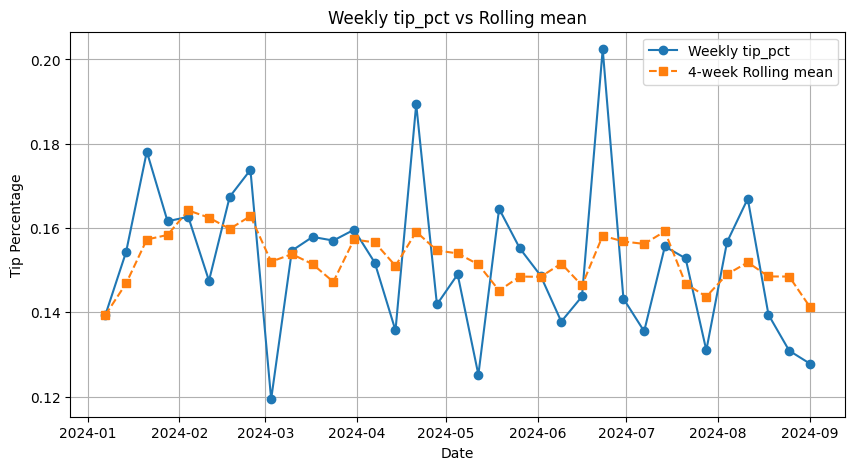

In [ ]:
import matplotlib.pyplot as plt
weekly = tips_ts.resample('W')[['total_bill', 'tip']].sum()
weekly['tip_pct'] = weekly['tip'] / weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
plt.figure(figsize=(10,5))
plt.plot(weekly.index, weekly['tip_pct'], marker='o', label='Weekly tip_pct')
plt.plot(weekly.index, weekly['tip_pct_roll4'], marker='s', linestyle='--', label='4-week Rolling mean')
plt.title('Weekly tip_pct vs Rolling mean')
plt.xlabel('Date')
plt.ylabel('Tip Percentage')
plt.legend()
plt.grid(True)
plt.show()

## 10) Rolling & Window Ops (10m)

daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
daily[['total_bill','roll14_med']].head()

### ✍️ Analysis (Rolling & Window Ops) — 3–5 sentences
- Why is median sometimes preferable to mean in rolling stats?
- What happens at the edges for rolling windows?
- When is `expanding` more suitable than `rolling`?

1) Because the median is less sensitive to outliers, giving a more robust measure of central tendency in skewed or noisy data.
2) At the edges, the rolling window has fewer data points than the full window size, so calculations use only the available values.
3) Expanding is more suitable when you want cumulative statistics from the start up to each point, rather than a fixed-size window.

### 🔎 Quick checks
- Show first 5 non-NaN rolling results.
- Report `min_periods` and justify it.

In [ ]:
rolling_window = daily['total_bill'].rolling(14, min_periods=1)
print(rolling_window.median().dropna().head())
print("min_periods =", rolling_window.min_periods)

date
2024-01-01    16.990
2024-01-02    13.665
2024-01-03    16.990
2024-01-04    19.000
2024-01-05    21.010
Freq: D, Name: total_bill, dtype: float64
min_periods = 1


### ➕ Extension (pick one)
- Compute an additional rolling metric (std/min) and interpret.
- Compare 7 vs 14-day windows with one sentence.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [ ]:
daily['roll14_std'] = daily['total_bill'].rolling(14, min_periods=1).std()
daily['roll14_min'] = daily['total_bill'].rolling(14, min_periods=1).min()
daily[['total_bill', 'roll14_std', 'roll14_min']].head()

,total_bill,roll14_std,roll14_min
date,,,
2024-01-01,16.99,NaN,16.99
2024-01-02,10.34,4.702,10.34
2024-01-03,21.01,5.389,10.34
2024-01-04,23.68,5.803,10.34
2024-01-05,24.59,5.825,10.34


## 11) Text Data: vectorized & regex (10m)

In [ ]:
import numpy as np
import pandas as pd
notes = np.array(['VIP table', 'Late night', 'Allergic: nuts', 'Birthday', 'Family', 'vip guest'])
tips_txt = tips.copy()
tips_txt['note'] = pd.Series(np.resize(notes, len(tips_txt)), dtype="string")
tips_txt['is_vip'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['allergy'] = tips_txt['note'].str.extract(r'Allergic:\s*(\w+)', expand=False)
tips_txt[['note', 'is_vip', 'allergy']].head()

,note,is_vip,allergy
0,VIP table,True,<NA>
1,Late night,False,<NA>
2,Allergic: nuts,False,nuts
3,Birthday,False,<NA>
4,Family,False,<NA>


### ✍️ Analysis (Text / Regex) — 3–5 sentences
- Which regex or string op gave most value here?
- How sensitive are your results to case/spacing?
- One potential false positive in your pattern.

1) The `.str.extract(r'Allergic:\s*(\w+)')` regex gave the most value by isolating specific allergens from text.
2) The results are case-insensitive for VIP detection but would fail if spacing or punctuation differs from the pattern, e.g., “Allergic\:peanuts” without a space wouldn’t match.
3) A potential false positive is if a note contains “vip” inside another word, like “viper” it would incorrectly flag `is_vip = True`.

### 🔎 Quick checks
- Print counts of a detected flag (e.g., VIP).
- Show unique extracted tokens (e.g., allergies).

In [ ]:
c = t['is_vip'].value_counts()
print("VIP counts:\n", c)
u = t['allergy'].dropna().unique()
print("Unique allergies detected:", u)

KeyError: 'is_vip'

### ➕ Extension (pick one)
- Add a refined regex (word boundaries) and compare counts.
- Normalize text further and re-check.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

In [ ]:
tips_txt['is_vip_orig'] = t['note'].str.contains('vip', case=False)
tips_txt['is_vip_refined'] = t['note'].str.contains(r'\bvip\b', case=False)
print("Original VIP count:", t['is_vip_orig'].sum())
print("Refined VIP count:", t['is_vip_refined'].sum())

## 12) Nullable dtypes & Memory (5m)

In [ ]:
tips_mem = tips.copy()
tips_mem['size_N'] = tips_mem['size'].astype('Int64')
tips_mem['sex_S']  = tips_mem['sex'].astype('string')
tips_mem['day_C']  = tips_mem['day'].astype('category')
tips_mem.memory_usage(deep=True)

### ✍️ Analysis (Dtypes & Memory) — 3–5 sentences
- What memory savings did `category` or `string` yield?
- When would you avoid `category`?
- Any effect on joins/groupbys?

### 🔎 Quick checks
- Show `memory_usage(deep=True)` before/after one cast.
- List `.cat.categories` for one column.

### ➕ Extension (pick one)
- Downcast numerics where safe and report delta.
- Switch one feature to `Int64` and explain why.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 13) I/O: CSV, Parquet, JSON, SQL (10m)

In [ ]:
subset = tips[['total_bill','tip','day','time','size']].head(20)
subset.to_csv('tips_sample.csv', index=False)
subset.to_parquet('tips_sample.parquet', index=False)
subset.to_json('tips_sample.json', orient='records', lines=True)
import sqlite3
con = sqlite3.connect(':memory:')
subset.to_sql('tips_tbl', con, index=False, if_exists='replace')
sql_df = pd.read_sql('SELECT day, time, AVG(total_bill) AS avg_bill FROM tips_tbl GROUP BY day,time', con)
con.close(); sql_df.head()

### ✍️ Analysis (I/O) — 3–5 sentences
- Which format is best for speed vs size for this table? Why?
- Did any dtype change after round-trip?
- When to use line-delimited JSON?

### 🔎 Quick checks
- Compare shapes from CSV/Parquet/JSON loads.
- Show one dtype discrepancy and fix it.

### ➕ Extension (pick one)
- Compress CSV (gzip) and note file size.
- Do a small SQL query and validate results match a groupby.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 14) Join Patterns (10–15m)

In [ ]:
left = tips[['day','time','size']].drop_duplicates().copy()
right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})
joined = left.merge(right, on=['day','time'], how='outer', indicator=True)
joined.head()

In [ ]:
# Right-only and inner (semi-join-style)
right_only = joined.loc[joined['_merge']=='right_only', right.columns]
inner_rows = joined.loc[joined['_merge']=='both', left.columns].drop_duplicates()
len(inner_rows)

In [ ]:
# merge_ordered and merge_asof demos
a = pd.DataFrame({'day':['Fri','Sat','Sun'], 'rank':[1,2,3]})
b = pd.DataFrame({'day':['Thur','Sat','Sun'], 'score':[70,80,90]})
ordered = pd.merge_ordered(a, b, on='day', how='outer')
events = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 10:00','2024-01-02 12:30','2024-01-04 09:00']),'event':['A','B','C']}).sort_values('when')
measures = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 09:45','2024-01-02 12:00','2024-01-03 18:00','2024-01-04 08:50']),'value':[10,20,15,30]}).sort_values('when')
asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))
ordered.head(), asof_join.head()

### ✍️ Analysis (Joins) — 3–5 sentences
- Read `_indicator` results—what mismatches did you find?
- Where would `merge_asof` fit in a real pipeline?
- Any ordering assumptions for `merge_ordered`?

### 🔎 Quick checks
- Report counts for left/right/inner.
- Show 2 sample rows from an anti-join.

### ➕ Extension (pick one)
- Perform a semi-join and explain the use-case.
- Add a composite key and re-merge.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 15) Method Chaining & `.pipe`, `.query`, `.eval` (10m)

In [ ]:
def add_bill_per_person(df): return df.assign(bill_per_person = df['total_bill']/df['size'])
pipe_demo = (tips.query("time=='Dinner'").pipe(add_bill_per_person)
             .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                 mean_tip_pct=('tip_pct','mean'))
             .sort_values('mean_bill_pp', ascending=False))
eval_demo = tips.eval('bill_pp = total_bill / size')
pipe_demo.head(), eval_demo[['total_bill','size','bill_pp']].head()

### ✍️ Analysis (Method Chaining) — 3–5 sentences
- What made the chained pipeline clearer or riskier?
- Where would you break the chain for debugging?
- When is `.eval` useful vs risky?

### 🔎 Quick checks
- Show final columns of your pipeline result.
- Confirm idempotency by re-running.

### ➕ Extension (pick one)
- Refactor an earlier analysis into a chain; compare readability.
- Encapsulate a step into `.pipe` and reuse it.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 16) Crosstab, `cut/qcut`, `where/mask` (5–10m)

In [ ]:
ct = pd.crosstab(tips['smoker'], tips['day'])
tips_bins = tips.copy()
tips_bins['bill_bucket'] = pd.cut(tips_bins['total_bill'], bins=[0,10,20,30,50])
bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
tips_q = tips.assign(q = pd.qcut(tips['tip_pct'], 4, duplicates='drop'))
ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()

### ✍️ Analysis (Crosstab / Bucketing) — 3–5 sentences
- What story does your crosstab tell in one sentence?
- How did `cut` vs `qcut` change bucket sizes?
- When is `where` preferable to boolean indexing?

### 🔎 Quick checks
- Show bucket edges and counts.
- Verify monotonicity of bucket means if expected.

### ➕ Extension (pick one)
- Swap `qcut`/`cut` and compare stats.
- Mask outliers and re-summarize.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

## 17) Styling & Export (5m)

In [ ]:
sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
         .style.format({'tip_pct':'{:.2%}'}).background_gradient(axis=None))
html = sty.to_html()
open('tips_report.html','w',encoding='utf-8').write(html)
'Wrote tips_report.html'

### ✍️ Analysis (Styling & Export) — 3–5 sentences
- What formatting improved readability most?
- How would a stakeholder use this HTML report?
- One caution about styled HTML vs raw data files.

### 🔎 Quick checks
- Open the HTML to spot issues (NA/odd values).
- Confirm underlying numbers (pre-style) are correct.

### ➕ Extension (pick one)
- Add one more style and explain choice.
- Export both styled HTML and CSV for same table.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

# Capstone Mini-Project (Free Dataset): **Titanic Survival Analysis** (30–45m)

**Source:** https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [ ]:
tit_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic = pd.read_csv(tit_url)
titanic.head()

In [ ]:
print("Shape:", titanic.shape)
print("\nInfo:"); print(titanic.info())
print("\nMissing values per column:"); print(titanic.isna().sum().sort_values(ascending=False).head(12))

## A) Data Cleaning & Feature Engineering

In [ ]:
df = titanic.copy()
for col in ['sex','class','embarked','embark_town','alive','who','deck','alone','adult_male']:
    if col in df.columns: df[col] = df[col].astype('category')
age_med = df.groupby(['sex','class'])['age'].transform('median')
df['age'] = df['age'].fillna(age_med)
if df['embark_town'].isna().any():
    mode_town = df['embark_town'].mode(dropna=True)
    if not mode_town.empty: df['embark_town'] = df['embark_town'].fillna(mode_town.iloc[0])
df['family_size'] = df['sibsp'].fillna(0) + df['parch'].fillna(0) + 1
df['fare_pp'] = df['fare'] / df['family_size']
df['deck'] = df['deck'].cat.add_categories(['Unknown']).fillna('Unknown')
bins = [0,12,18,35,50,80]; labels = ['Child','Teen','YoungAdult','MidAge','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

### ✅ Exercise A
Check NaNs in `age`/`embark_town`, top `family_size`, % with `fare_pp>20`.

**Hints:**
- Concept: impute & feature engineer.
- API: `groupby().transform('median')`, `.mode()`, `.cut`.


In [ ]:
# YOUR WORK: Exercise A

## B) Survival Patterns

In [ ]:
overall_survival = df['survived'].mean(); print('Overall survival rate:', round(overall_survival,3))

In [ ]:
surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])
plt.figure(); plt.bar(surv_by_class.index.astype(str), surv_by_class.values)
plt.title('Survival Rate by Class'); plt.xlabel('class'); plt.ylabel('survival rate'); plt.show()

In [ ]:
piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Survival Rate by Sex × Class'); plt.xlabel('class'); plt.ylabel('sex')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show(); piv

### ✅ Exercise B
1) Histogram of age. 2) Boxplot fare by class. 3) Bar of survival by age_group.

**Hints:**
- Concept: univariate + grouped visuals.
- API: `plt.hist`, `plt.boxplot`, `groupby().mean` + `plt.bar`.


In [ ]:
# YOUR WORK: Exercise B

## C) Subgroup Discovery

In [ ]:
grp = (df.groupby(['sex','class','embark_town'])
         .agg(n=('survived','size'), surv_rate=('survived','mean'))
         .query('n >= 25')
         .sort_values('surv_rate', ascending=False))
grp.head(10)

### ✅ Exercise C
Families with `family_size≥4`: survival by `sex` & `class` (n + rate). Bucket `fare_pp` and compute survival per bucket.

**Hints:**
- Concept: subgroup analysis with thresholds.
- API: `groupby().agg`, `query`, `cut`.


In [ ]:
# YOUR WORK: Exercise C

## D) Deliverables

In [ ]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

### ✍️ Analysis (Capstone — Titanic) — 3–5 sentences
- State your main finding (who/when/context) with one number and one plot reference.
- Name one limitation in your approach (bias, leakage, imputation).
- Suggest a next step or feature to add.

### 🔎 Quick checks
- Link the exact cell/table backing your claim.
- Confirm deliverables (HTML + CSV) were written.

### ➕ Extension (pick one)
- Add an extra feature (e.g., `is_child`, z-scored fare) and see if subgroup ranking changes.
- Try a different minimum group size and discuss stability.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1